# Multi-class Classification and Neural Network with Scikit Learn

This assignment is going to be a real fun. Because here we will use one-vs-all Logistic  Regression and Neural network **to recognise hand-written words**. <br />
## 1.1 Multi-Class Classification:
**Problem context:** <br />
>For this exercise, you will use logistic regression and neural networks to
recognize handwritten digits (from 0 to 9). Automated handwritten digit
recognition is widely used today - from recognizing zip codes (postal codes)
on mail envelopes to recognizing amounts written on bank checks. This
exercise will show you how the methods you’ve learned can be used for this
classification task.<br />
In the first part of the exercise, you will extend your previous implemention of logistic regression and apply it to one-vs-all classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm   # various work with colormap
import scipy.io       #to use .mat file
from scipy.special import expit
from scipy import optimize
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
datafile=scipy.io.loadmat('ex3data1.mat')

## 1.2 Visualize Data:
First of all, our file is in .mat format. So we have used scipy.io. Few words about this data: <br />
>"After loading, matrices of the correct dimensions and values will appear in your program’s memory. The matrix
will already be named, so you do not need to assign names to them."

>"There are 5000 training examples in ex3data1.mat, where each training
example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is
represented by a floating point number indicating the grayscale intensity at
that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional
vector. Each of these training examples becomes a single row in our data
matrix X. This gives us a 5000 by 400 matrix X where every row is a training
example for a handwritten digit image."


In [3]:
X=datafile['X'] 

>The second part of the training set is a 5000-dimensional vector y that
contains labels for the training set. To make things more compatible with
Octave/MATLAB indexing, where there is no zero index, we have mapped
the digit zero to the value ten. Therefore, a “0” digit is labeled as “10”, while
the digits “1” to “9” are labeled as “1” to “9” in their natural order.

In [4]:
y=datafile['y']

In ex1 and ex2, we have plotted data (x,y) as points. But it is quite different in this case. Here, we have data for an image. If we write our steps in few parts: <br />
* <u>Step 01 </u> <br />
we have to choice a row from X and reshape in (20,20) order matrix. This part is really easy.

* <u>Step 02 </u> <br />
Here we will plot data as image. We have a nice function named **imshow** in matplotlib for that. For details, please have a look [here](https://www.youtube.com/watch?v=HW29067qVWk).

* <u>Step 03 </u> <br />
As the instruction for displayData function, we have to make image like Figure 1 from ex3.pdf. For that we have to know how to plot subplots. We will use **subplots** function.<br />
There is a nice writing about how to plot multiple subplots [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html). Hope you will enjoy that.


In [5]:
#code for Visualization
def displayData(row_image_number,column_image_number): #number of images in row and column. It should be greater than 1
    fig,ax= plt.subplots(row_image_number,column_image_number,figsize=(row_image_number,column_image_number))
    for i in range(row_image_number):
        for j in range(column_image_number):
            image_data=X[np.random.randint(X.shape[0])].reshape((20,20),order='F') #according to given data about ex3data1
            ax[i,j].imshow(image_data,cmap = cm.Greys_r)  #make image in grey scale
            ax[i,j].axis('off')
    fig.suptitle('Fig 01: Examples from the dataset')
    return fig   

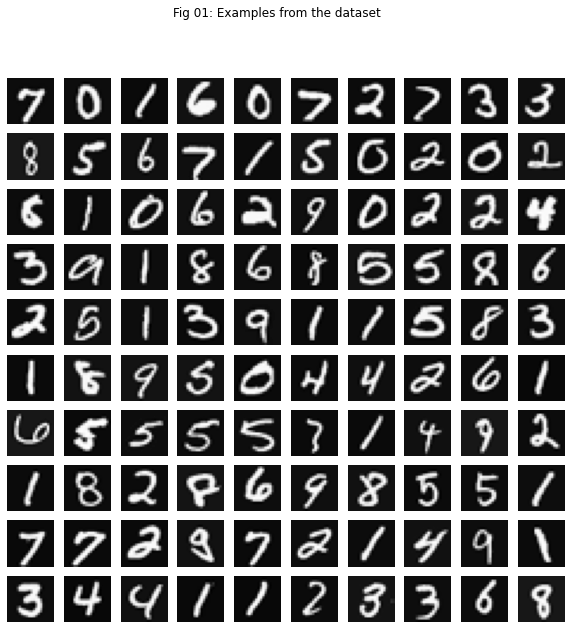

In [6]:
example_image=displayData(10,10)

## 1.3 Train your data with Logistic Regression

**Train-Test Split** <br />
Here we split our data in two parts. We use one part for modelling our model and another part to test our model. It is a nice way to detect 'overfitting' problem. For more details, check [here](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
log_reg = LogisticRegression(C=1.0,max_iter=400)

In [9]:
log_reg.fit(X_train,np.ravel(y_train))

LogisticRegression(max_iter=400)

**Result**

In [10]:
predicted_data=log_reg.predict(X_test)

**Final $\Theta$- coefficients**

In [11]:
theta_cofficients=(log_reg.coef_, log_reg.intercept_)

In [19]:
print(log_reg.coef_.shape)

(10, 400)


**Accuracy**

In [12]:
score = log_reg.score(X_test, y_test)
print(score)

0.91


## 2.1 Neural Network
**Problem context** <br />
>In the previous part of this exercise, you implemented multi-class logistic regression to recognize handwritten digits. However, logistic regression cannot form more complex hypotheses as it is only a linear classifier. In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses.  <br /> For this week, you will be using parameters from a neural network that we have already trained. Your goal is to implement the feedforward propagation algorithm to use our weights for prediction. In next week’s exercise, you will write the backpropagation algorithm for learning the neural network parameters.

**Model Representation**
>Our neural network has 3 layers – an input layer, a hidden layer and an output layer. Recall that our inputs are pixel values of
digit images. Since the images are of size 20×20, this gives us 400 input layer units (excluding the extra bias unit which always outputs +1). As before, the training data will be loaded into the variables X and y.

>You have been provided with a set of network parameters (Θ(1)
, Θ(2))
already trained by us. These are stored in ex3weights.mat and will be loaded by ex3 nn.m into Theta1 and Theta2. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

In [13]:
datafile_2=scipy.io.loadmat('ex3weights.mat')

In [14]:
theta_1=datafile_2['Theta1']
print(theta_1.shape)

(25, 401)


In [15]:
theta_2=datafile_2['Theta2']
print(theta_2.shape)

(10, 26)


**Find accuracy of given model parameters**

This problem is pretty simple. We can solve it with elementary python and that is not time-consuming at all. So, we are just trying to predict the accuracy here. <br />

See in X, there are example of 5000 figures of 20$\times$20 pixel. So there will be 400 features and we have to add $a_{0}^{1}$. So $a^{1}$ will be a column matrix of order $401\times1$. Now, $Z^{2}=\Theta^{1}a^{1}$. Then simply, $a^{2}=g(Z^{2})$. And, we will again add bias in $a^{2}$. So, $a^{2}$ should be order of 26$\times$1. Then,  $Z^{3}=\Theta^{2}a^{2}$. Again, $a^{3}=h_{\Theta}(x)=g(Z^{3})$.
<br />

For more details, please see figure 2 in assignment pdf.

In [16]:
m=5000     #number of total example
count=0

for i in range (0,m,1):
    a_1=np.vstack((1,X[i].reshape(-1,1))) #addin bias in a_1
    a_2=expit(np.matmul(theta_1,a_1))  #solve for a_2
    a_3=expit(np.matmul(theta_2,np.vstack((1.0,a_2)))) #solve for a_3
    
    #finding accuracy
    if (np.argmax(a_3)+1)!=np.ravel(y)[i]:
        count=count+1
    
print('accuracy percentage is',100-count*100/m)
 

accuracy percentage is 97.52


So, we have done digit recognition model. That is really exciting. In case of logistic regression model, our model accuracy is about 92.8% and using neural network forward propagation, that is about 97.5%. Pretty good, na? Hope, next assignment will be more exciting! <br />

### CHEERS!!
